In [ ]:
#                               Machine Learning Intro | Assignment

In [ ]:
# Questions Answers

In [ ]:
#Q1) Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).

'''
Answer: Artificial Intelligence (AI): Broad field aimed at creating machines/systems that perform tasks that normally require human intelligence (planning, reasoning, perception). Includes rule-based systems, search, optimization, ML, etc.

        Machine Learning (ML): Subset of AI where systems learn patterns from data to make predictions/decisions without explicit rules. Algorithms: linear/logistic regression, SVM, trees, ensembles, etc.

        Deep Learning (DL): Subset of ML using deep neural networks (many layers). Excels with large datasets and unstructured data (images, audio, text). Examples: CNNs, RNNs, Transformers.

        Data Science (DS): Interdisciplinary field combining statistics, ML, domain knowledge, and data engineering to extract insights from data, build analyses/models, and communicate results. DS often uses ML/DL as tools.

'''

In [ ]:
#Q2) What are the types of machine learning? Describe each with one real-world example.

'''
Answer: Supervised Learning: Learn mapping from inputs to labeled outputs.
Example: Email spam classification (emails labeled spam/ham).

Unsupervised Learning: Discover structure in unlabeled data.
Example: Customer segmentation with k-means for marketing.

Semi-supervised Learning: Use small labeled + large unlabeled datasets.
Example: Webpage classification where labeling is expensive.

Reinforcement Learning: Learn policy via rewards from environment.
Example: Game-playing agents (AlphaZero) or robotics navigation.

Self-supervised Learning: Create labels from data itself (pretext tasks).
Example: Pretraining language models (predict next word/token).

Multi-task / Transfer Learning: Reuse knowledge across tasks.
Example: Fine-tuning ImageNet-pretrained CNN for medical image classification.

'''

In [ ]:
#Q3) Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.

'''
Answer: Overfitting: Model learns noise or spurious patterns from training data; high training accuracy but poor generalization on new data. Symptoms: complexity too high relative to data, large gap between train/test error.

Underfitting: Model too simple to capture underlying structure; high error on both train and test sets.

Bias–Variance Tradeoff:

Bias: Error from wrong assumptions / oversimplified model (causes underfitting).

Variance: Error from sensitivity to training data (causes overfitting).
Goal: choose model complexity and regularization to minimize total error (bias² + variance + irreducible noise).

'''


In [ ]:
#Q4) What are outliers in a dataset, and list three common techniques for handling them.

'''
Answer: Outliers: Data points that deviate markedly from other observations; could be due to measurement error, rare events, or genuine variability.

Techniques:

Remove points after domain-driven checks (only if clearly erroneous).

Transform variables (e.g., log, Box–Cox) to reduce effect of extreme values.

Robust methods / winsorization / clipping — replace extreme values with percentiles (e.g., cap at 1st/99th percentile) or use robust estimators (median, robust scaling).

Additional: detect via z-score/IQR/LOF and treat case-by-case.

'''


In [ ]:
#Q5) Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.

'''
Answer: Process:

Assess missingness: compute % missing per column; determine mechanism: MCAR, MAR, MNAR.

Decide strategy: drop features/rows with too many missing values; otherwise impute.

Apply imputation appropriate to variable type and downstream model (and keep indicator columns if useful).

Validate: compare distributions pre/post imputation; consider multiple imputation when uncertainty matters.

One imputation technique (numerical): Mean imputation (or median if skewed).

One imputation technique (categorical): Mode imputation (most frequent category) or treat missing as its own category ('Missing').

'''

In [1]:
#Q6) Write a Python program that:
'''● Creates a synthetic imbalanced dataset with make_classification() from
sklearn.datasets.
● Prints the class distribution.
'''

from sklearn.datasets import make_classification
from collections import Counter

X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42)
print(Counter(y))



Counter({np.int64(0): 900, np.int64(1): 100})


In [2]:
#Q7) Implement one-hot encoding using pandas for the following list of colors: ['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.

import pandas as pd
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame({'color': colors})
df_ohe = pd.get_dummies(df, columns=['color'])
print(df_ohe)


   color_Blue  color_Green  color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


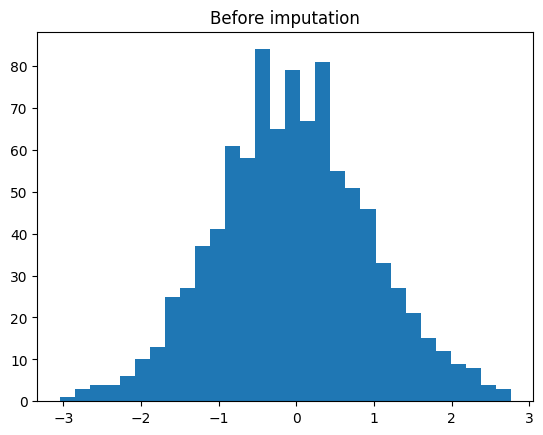

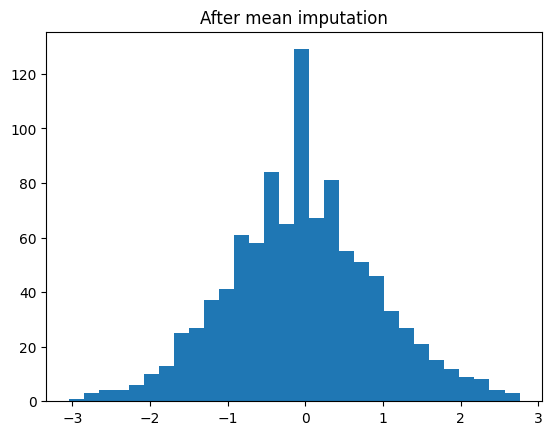

In [3]:
#Q8) Write a Python script to:
'''● Generate 1000 samples from a normal distribution.
● Introduce 50 random missing values.
● Fill missing values with the column mean.
● Plot a histogram before and after imputation.
'''


import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
samples = np.random.normal(loc=0, scale=1, size=1000)
# introduce 50 random NaNs
nan_idx = np.random.choice(len(samples), 50, replace=False)
samples_with_nan = samples.copy()
samples_with_nan[nan_idx] = np.nan

# impute with column mean
mean_val = np.nanmean(samples_with_nan)
imputed = samples_with_nan.copy()
imputed[np.isnan(imputed)] = mean_val

# histograms (before imputation ignoring NaNs, and after)
plt.hist(samples_with_nan[~np.isnan(samples_with_nan)], bins=30)
plt.title("Before imputation")
plt.show()

plt.hist(imputed, bins=30)
plt.title("After mean imputation")
plt.show()


In [4]:
#Q9) Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15, 20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.


from sklearn.preprocessing import MinMaxScaler
import numpy as np

values = np.array([[2], [5], [10], [15], [20]], dtype=float)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values).flatten()
print(scaled)


[0.         0.16666667 0.44444444 0.72222222 1.        ]


In [6]:
#Q10) You are working as a data scientist for a retail company. You receive a customer transaction dataset that contains:
'''● Missing ages,
● Outliers in transaction amount,
● A highly imbalanced target (fraud vs. non-fraud),
● Categorical variables like payment method.
Explain the step-by-step data preparation plan you’d follow before training a machine learning
model. Include how you’d address missing data, outliers, imbalance, and encoding.'''


'''
Answer: Step-by-step plan

Understand & explore:

Inspect columns, data types, missingness %, unique values, and basic stats.

Visualize distributions (age, transaction amount), and class imbalance (fraud vs non-fraud).

Missing ages:

If missing % is small: consider imputing age (numerical). Techniques:

Median (robust to outliers) or predictive imputation (e.g., train a simple model to predict age using other features).

Create an indicator column age_missing = 1 if missing (so model can use missingness signal).

If missing pattern is systematic (MNAR), consult domain knowledge or flag and handle specially.

Outliers in transaction amount:

Detect using IQR (values outside [Q1 - 1.5 IQR, Q3 + 1.5 IQR]) or z-score, or robust methods.

Handle based on cause:

If measurement error: remove or correct if known.

If valid but extreme: either transform (log scale) or cap (winsorize) e.g., cap at 99th percentile.

Consider using models robust to outliers (tree-based) or using features like log_amount.

Imbalanced target (fraud vs non-fraud)

Use a combination of:

Appropriate evaluation metrics: precision, recall, F1-score, ROC-AUC, PR-AUC (PR-AUC often more informative for rare positives).

Resampling strategies for training only:

Oversampling minority: SMOTE / ADASYN (careful with high-dimensional noisy data).

Undersampling majority: RandomUnderSampler or more advanced (NearMiss).

Class weighting in algorithms (e.g., class_weight='balanced' in sklearn).

Ensemble approaches (balanced random forest) and threshold tuning to trade off precision/recall.

Categorical variables (payment method, etc.)

Low-cardinality categories (payment method): one-hot encode (or target encoding if many categories).

For high-cardinality: target encoding / frequency encoding with proper cross-validation to prevent leakage.

Keep Unknown / Missing category if missing.

Feature engineering:

Create features: log_amount, amount_per_item, is_night_txn, customer_age_group, days_since_last_txn, payment_method_numeric, etc.

Interaction features that make sense for fraud detection (e.g., payment method × country).

Scaling :

Scale numeric features when needed (e.g., MinMax or StandardScaler) especially for distance-based models or neural nets. Tree models typically don't require scaling.

Split & cross-validation:

Use time-aware split if transactions are time-ordered (train on earlier dates, validate later).

For standard cross-validation, use stratified CV for imbalanced classes (StratifiedKFold).

Modeling & evaluation:

Try robust classifiers: XGBoost/LightGBM/CatBoost (handle categorical data better), RandomForest, logistic regression with regularization.

Use ROC and PR curves; choose operating point based on business cost (cost of false positives vs false negatives).

Use calibration (Platt scaling / isotonic) if probability estimates are needed.

Deployment & monitoring:

Save preprocessing pipeline (imputation, encoding, scaling).

Monitor model performance drift and data quality; retrain when necessary.

'''
